# Введение в Pytorch

Александр Дьяконов, 2020

#### использованные материалы

* https://github.com/MLWhiz/data_science_blogs/blob/master/pytorch_guide/Pytorch%20Guide.ipynb
* https://d2l.ai/
* https://atcold.github.io/pytorch-Deep-Learning/
* семинары OzonMasters
* https://habr.com/ru/post/334380/

### Фишки Pytorch:

* очень похож на numpy, но многие вещи строже
* динамический граф вычислений (создаётся при работе)
* можно вычислять на GPU (минимальные изменения кода)
* хорошо поддерживается, есть полезные модули (например, torchvision)

In [1]:
# from __future__ import print_function
import torch
import numpy as np

In [2]:
# служебная функция

from matplotlib import pyplot as plt

def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)

def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)

## Помощь, общие моменты

In [ ]:
# основная помощь
torch.nn.Module?

In [ ]:
# + код функции
torch.nn.Module??

In [153]:
# Проверка версии
from platform import python_version
print(python_version())
print(torch.__version__)

3.7.3
1.5.0


## Тензоры
* тензоры
* доступ к элементам, слайсинг
* реализация inplace-операций
* связь с numpy
* параметры тензора
* выцепление элементов (item)

In [206]:
x = torch.FloatTensor(2, 3)
print (x, x.data_ptr()) # + где лежит в памяти

tensor([[0., 0., 0.],
        [0., 0., 0.]]) 1685962910464


In [10]:
# пустая матрица (тензор)
x = torch.empty(3, 5)
print(x)

tensor([[1.0194e-38, 8.4490e-39, 1.0469e-38, 9.3674e-39, 9.9184e-39],
        [8.7245e-39, 9.2755e-39, 8.9082e-39, 9.9184e-39, 8.4490e-39],
        [9.6429e-39, 1.0653e-38, 1.0469e-38, 4.2246e-39, 1.0378e-38]])


In [11]:
x[:,:2]

tensor([[1.0194e-38, 8.4490e-39],
        [8.7245e-39, 9.2755e-39],
        [9.6429e-39, 1.0653e-38]])

In [12]:
x[:,[1]], x[:, 1]

(tensor([[8.4490e-39],
         [9.2755e-39],
         [1.0653e-38]]),
 tensor([8.4490e-39, 9.2755e-39, 1.0653e-38]))

In [13]:
# случайная матрица
torch.manual_seed(123)
x = torch.rand(3, 5)
print(x)

tensor([[0.2961, 0.5166, 0.2517, 0.6886, 0.0740],
        [0.8665, 0.1366, 0.1025, 0.1841, 0.7264],
        [0.3153, 0.6871, 0.0756, 0.1966, 0.3164]])


In [14]:
# заполнение
x.fill_(3) # черта - признак выполнения на данном тензоре

tensor([[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]])

In [15]:
# обнуление
x.zero_()

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [16]:
torch.arange(1, 5)

tensor([1, 2, 3, 4])

In [20]:
# матрица из данных
x = torch.tensor([[1, 2], [3, 4]])
print(x, x.type(), x.dim(), x.size(), x.numel()) # тип тензора

tensor([[1, 2],
        [3, 4]]) torch.LongTensor 2 torch.Size([2, 2]) 4


In [21]:
# из numpy.array
torch.from_numpy(np.ones((2, 2)))

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [26]:
x = torch.rand(5, 3)
print(x)
print (x.max(), x.max().item()) # item - выцепляет элемент

tensor([[0.1479, 0.5331, 0.4066],
        [0.2318, 0.4545, 0.9737],
        [0.4606, 0.5159, 0.4220],
        [0.5786, 0.9455, 0.8057],
        [0.6775, 0.6087, 0.6179]])
tensor(0.9737) 0.9737018942832947


In [124]:
x = torch.tensor([[1, 2], [3, 4]])

# как хранятся данные, где следующий элемент по каждой из разметностей
print (x, x.storage(), x.stride(), x.t().stride()) 

tensor([[1, 2],
        [3, 4]])  1
 2
 3
 4
[torch.LongStorage of size 4] (2, 1) (1, 2)


In [130]:
x = torch.tensor([[1, 2], [3, 4]])
y = x.clone()
# print (id(x.storage()) == id(y.storage()))
x[0, 0] = 10
print (x, y)
xt = x.t_()
x[0, 0] = 30
print (x, xt)

tensor([[10,  2],
        [ 3,  4]]) tensor([[1, 2],
        [3, 4]])
tensor([[30,  3],
        [ 2,  4]]) tensor([[30,  3],
        [ 2,  4]])


## Тензоры - получение одних из других 

In [23]:
# клонирование
x = torch.tensor([[1, 2], [3, 4]])
x2 = x.clone() # в отличие от copy_() через оригинал проносят градиенты
x[0, 1] = 10 
x, x2

(tensor([[ 1, 10],
         [ 3,  4]]),
 tensor([[1, 2],
         [3, 4]]))

In [24]:
# матрица такого же размера
y = torch.randn_like(x, dtype=torch.float)
print(y)

tensor([[ 0.3123,  1.3540],
        [-0.3501,  1.6162]])


In [41]:
# конкатенация по 0 и 1 размерностям
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
torch.cat([x, y], axis=1), torch.cat([x, y], axis=0)

(tensor([[1, 2, 2, 2],
         [3, 4, 2, 2]]),
 tensor([[1, 2],
         [3, 4],
         [2, 2],
         [2, 2]]))

In [48]:
# создание фиктивной размерности - в какую позицию вставлять фиктивную
x.unsqueeze(dim=0).shape, x.unsqueeze(dim=1).shape, x.unsqueeze(dim=2).shape

(torch.Size([1, 2, 2]), torch.Size([2, 1, 2]), torch.Size([2, 2, 1]))

In [49]:
# конкатенация по 2-й размерности
torch.cat([x.unsqueeze(dim=2), y.unsqueeze(dim=2)], axis=2)

tensor([[[1, 2],
         [2, 2]],

        [[3, 2],
         [4, 2]]])

In [141]:
# удаляем единичные размеры
torch.empty(3, 1, 2, 1).squeeze().shape

torch.Size([3, 2])

In [160]:
x = torch.tensor([[1, 2], [3, 4]])
print(3 * x.add(2)) # смотри на порядок операций
print(x * x.add(2)) # смотри на порядок операций
print(x * x.add_(2)) # смотри на порядок операций

tensor([[ 9, 12],
        [15, 18]])
tensor([[ 3,  8],
        [15, 24]])
tensor([[ 9, 16],
        [25, 36]])


## Операции над тензорами

In [208]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
v = torch.tensor([1, 2])

In [28]:
# сложение
x + y

tensor([[3, 4],
        [5, 6]])

In [29]:
x.add(y)

tensor([[3, 4],
        [5, 6]])

In [30]:
x * y

tensor([[2, 4],
        [6, 8]])

In [31]:
x @ y, x.mm(y)
# скалярные произведения по строкам

(tensor([[ 6,  6],
         [14, 14]]),
 tensor([[ 6,  6],
         [14, 14]]))

In [217]:
print (torch.dot(v, v), v.dot(v)) # скалярное умножение
torch.dot(x.view(-1), y.view(-1))

tensor(5) tensor(5)


tensor(20)

In [211]:
torch.mv(x, v), x.mv(v) # умножение на вектор

(tensor([ 5, 11]), tensor([ 5, 11]))

In [32]:
# inplace
y.add_(x)

tensor([[3, 4],
        [5, 6]])

In [34]:
x.type(torch.DoubleTensor).log() # приводим тип - иначе не сработает log

tensor([[0.0000, 0.6931],
        [1.0986, 1.3863]], dtype=torch.float64)

In [35]:
x.pow(2), x**2

(tensor([[ 1,  4],
         [ 9, 16]]),
 tensor([[ 1,  4],
         [ 9, 16]]))

In [36]:
# транспонирование
x.t()

tensor([[1, 3],
        [2, 4]])

In [37]:
# эквивалениное транспонирование
x.transpose(0, 1)

tensor([[1, 3],
        [2, 4]])

In [222]:
# как распределяется память
# ПРОВЕРИТЬ В ПОСЛЕДНЕЙ ВЕРСИИ?????

x = torch.Tensor([1, 2])
y = torch.Tensor([1, 1])
z = torch.Tensor([0, 2])

print (x + y - z) # два промежуточных тензора будут созданы.
print (x.add(y).sub_(z)) # один промежуточный тензор.
print (x.add_(y).sub_(z)) # не будет создано промежуточных тензоров
print(x) # поменяется

tensor([2., 1.])
tensor([2., 1.])
tensor([2., 1.])
tensor([2., 1.])


## статистики над тензорами, размеры
* ...
* связь с Numpy
* приведение размеров

In [50]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

In [218]:
torch.sum(x), x.sum(), x.sum(axis=0), x.sum(axis=1)

(tensor(10), tensor(10), tensor([4, 6]), tensor([3, 7]))

In [219]:
torch.max(x), x.max(), x.max(axis=0), x.max(axis=1)

(tensor(4),
 tensor(4),
 torch.return_types.max(
 values=tensor([3, 4]),
 indices=tensor([1, 1])),
 torch.return_types.max(
 values=tensor([2, 4]),
 indices=tensor([1, 1])))

In [53]:
# resize/reshape
x = torch.rand(2, 2)

a = x.view(4)
b = x.view(2, 1, -1)

y  = x.reshape(1, 4)

print (x.size(), a.size(), b.size(), y.size())

torch.Size([2, 2]) torch.Size([4]) torch.Size([2, 1, 2]) torch.Size([1, 4])


In [54]:
# переставить размерности

x = torch.rand(2, 3, 5)
x.permute(1,0,2).size()

torch.Size([3, 2, 5])

In [19]:
# -> numpy

x.numpy()

array([[1, 2],
       [3, 4]], dtype=int64)

In [187]:
# numpy -> pytorch
# изменение в Numpy атоматически меняет тензор

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.Tensor(a)
print(a)
print(b)
print(c)
np.add(a, 10, out=a)
# a = a + 1 # а так - нет
print(a)
print(b)
print(c) # а тут нет

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.])
[11. 11. 11. 11. 11.]
tensor([11., 11., 11., 11., 11.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.])


In [15]:
# приведение размеров

x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([10, 20])

x + y

tensor([[11, 22],
        [13, 24]])

## Сохранение и загрузка тензоров

In [64]:
# сохранение и загрузка тензоров
torch.save(x, 'x-file')
x2 = torch.load("x-file")
x2

tensor([1., 2., 3.])

In [65]:
torch.save([x, y],'x-files')
x2, y2 = torch.load('x-files')
(x2, y2)

(tensor([1., 2., 3.]),
 tensor([[ 3.,  0.],
         [ 3., 12.]], requires_grad=True))

In [66]:
mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([1., 2., 3.]),
 'y': tensor([[ 3.,  0.],
         [ 3., 12.]], requires_grad=True)}

## Тензоры: примеры

In [134]:
# OHE
target = torch.tensor([0,3,2,2,0])
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [148]:
# матрица -> вектор
x = torch.rand(10, 20, 30, 40)
print (x.view(-1, 20, 30*40).shape)
print (torch.flatten(x, 2).shape)

torch.Size([10, 20, 1200])
torch.Size([10, 20, 1200])


## GPU

переменные и модели на разных устройствах не видят друг друга!

In [ ]:
# самая популярная конструкция
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device) # перенос на доступное устройство

In [8]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device) 
    x = x.to(device) 
    z = x + y
    print(z)
    print(z.to("cpu", torch.double)) 
else:
    device = torch.device("cpu")

tensor([[2, 3],
        [4, 5]], device='cuda:0')
tensor([[2., 3.],
        [4., 5.]], dtype=torch.float64)


In [ ]:
x.cuda()
x.cpu()
x.is_cuda

In [ ]:
# Whether to train on a gpu
train_on_gpu = torch.cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')# Number of gpus
if train_on_gpu:
    gpu_count = torch.cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False
if train_on_gpu:
    model = model.to('cuda')
if multi_gpu:
    model = nn.DataParallel(model)

Ниже эксперименты со временем

In [191]:
x = torch.randn((1000, 1000))
y = torch.randn((1000, 1000))

In [193]:
%%time
z = x @ y 

Wall time: 11 ms


In [195]:
%%time
x = x.cuda()
y = y.cuda() # на перебрасывание тоже нужно время
z = x @ y 

Wall time: 4.96 ms


## Авто дифференцирование

In [161]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)

y = 3 * (x - 2) ** 2

f = y.mean()

print (f)

tensor(4.5000, grad_fn=<MeanBackward0>)


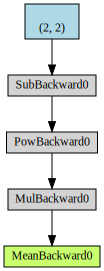

In [162]:
from torchviz import make_dot

make_dot(f)

In [163]:
f.backward()
print(x, x.grad, 3*2*(x - 2)/4)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True) tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]]) tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]], grad_fn=<DivBackward0>)


In [168]:
x += 1 # будет ошибка - inplace-операции не работают
f.grad, y.grad # тут тоже ничего нет !!! (не было requires_grad=True - по этим переменным не бралась производная)

(None, None)

In [60]:
x = torch.Tensor([1, 2, 3])
w = torch.tensor(torch.Tensor([1, 1, 1]), requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([1., 2., 3.])


C:\Users\djako\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [61]:
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n') # идёт накопление!!!

None
tensor([2., 4., 6.])


In [62]:
with torch.no_grad(): # нет накопления
    z = w @ x
    # z.backward()
print(x.grad, w.grad, sep='\n')

w.grad.data.zero_() # а так - совсем обнулить
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

None
tensor([2., 4., 6.])
None
tensor([1., 2., 3.])


In [63]:
# w.numpy() - будет ошибка
w.detach().numpy() # создаётся копия, которую можно в np - у неё requires_grad=False

array([1., 1., 1.], dtype=float32)

In [188]:
# динамический граф вычислений в цикле

x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
x0 = x
for i in range(2):
    x = x * x

z = x.mean() # здесь будет 1/4 !!!
z.backward()

print(x, x.grad)
print(x0, x0.grad) # градиент лежит здесь!!!
# поскольку x превратился во внутреннюю вершину графа вычислений

tensor([[  1.,  16.],
        [ 81., 256.]], grad_fn=<MulBackward0>) None
tensor([[1., 2.],
        [3., 4.]], requires_grad=True) tensor([[ 1.,  8.],
        [27., 64.]])


## TensorDataset / DataLoader

организация подачи данных в модель
* DataLoader - подаёт батчами
* TensorDataset - для представления датасета

In [69]:
from torch.utils.data import TensorDataset
import numpy as np

x = torch.from_numpy(np.vstack([np.arange(10, dtype='float32'), np.ones(10, dtype='float32')]).T)
y = torch.from_numpy(np.arange(10, dtype='float32')[:, np.newaxis] ** 2)

train_ds = TensorDataset(x, y)

from torch.utils.data import DataLoader

batch_size = 4
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

for xb, yb in train_dl:
    print(xb)
    print(yb)
    # break

tensor([[3., 1.],
        [9., 1.],
        [7., 1.],
        [5., 1.]])
tensor([[ 9.],
        [81.],
        [49.],
        [25.]])
tensor([[1., 1.],
        [8., 1.],
        [6., 1.],
        [4., 1.]])
tensor([[ 1.],
        [64.],
        [36.],
        [16.]])
tensor([[2., 1.],
        [0., 1.]])
tensor([[4.],
        [0.]])


In [ ]:
# загрузка с трансформациями
from torchvision import datasets

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

In [ ]:
# есть стандартные датасеты
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [ ]:
# загрузка из директории

traindir = "/home/rahul/projects/compvisblog/data/train/"
t = transforms.Compose([transforms.Resize(size=256),
                        transforms.CenterCrop(size=224),
                        transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(root=traindir, transform=t)

for i in range(0,len(train_dataset)):
    image ,label = train_dataset[i]
    print(image,label)
    break
    
train_dataloader = DataLoader(train_dataset,batch_size = 64, shuffle=True, num_workers=10)
for image_batch, label_batch in train_dataloader:
    print(image_batch.size(),label_batch.size())
    break

In [107]:
# все трансформации
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

Чтобы pytorch работал с датасетом, надо определить
* __getitem__
* __len__

In [ ]:
# Свой датасет
class CustomTextDataset(Dataset):
    '''
    Simple Dataset initializes with X and y vectors
    We start by sorting our X and y vectors by sequence lengths
    '''
    def __init__(self,X,y=None):
        self.data = list(zip(X,y))
        # Sort by length of first element in tuple
        self.data = sorted(self.data, key=lambda x: len(x[0]))
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
# свой загрузчик данных
from glob import glob
from PIL import Image
from torch.utils.data import Dataset

class customImageFolderDataset(Dataset):
    """Custom Image Loader dataset."""
    def __init__(self, root, transform=None):
        """
        Args:
            root (string): Path to the images organized in a particular folder structure.
            transform: Any Pytorch transform to be applied
        """
        # Get all image paths from a directory
        self.image_paths = glob(f"{root}/*/*")
        # Get the labels from the image paths
        self.labels = [x.split("/")[-2] for x in self.image_paths]
        # Create a dictionary mapping each label to a index from 0 to len(classes).
        self.label_to_idx = {x:i for i,x in enumerate(set(self.labels))}
        self.transform = transform
        
    def __len__(self):
        # return length of dataset
        return len(self.image_paths)
      
    def __getitem__(self, idx):
        # open and send one image and label
        img_name = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image,self.label_to_idx[label]

### датасет с несколькими входами в сеть

In [2]:
# если несколько входов в сеть

from torch.utils.data import DataLoader, Dataset

class TrainDataset(Dataset):
    def __init__(self, df, num_features, cat_features, labels):
        self.cont_values = df[num_features].values
        self.cate_values = df[cat_features].values
        self.labels = labels
        
    def __len__(self):
        return len(self.cont_values)

    def __getitem__(self, idx):
        cont_x = torch.FloatTensor(self.cont_values[idx])
        cate_x = torch.LongTensor(self.cate_values[idx])
        label = torch.tensor(self.labels[idx]).float()
        
        return cont_x, cate_x, label
    

class TestDataset(Dataset):
    def __init__(self, df, num_features, cat_features):
        self.cont_values = df[num_features].values
        self.cate_values = df[cat_features].values
        
    def __len__(self):
        return len(self.cont_values)

    def __getitem__(self, idx):
        cont_x = torch.FloatTensor(self.cont_values[idx])
        cate_x = torch.LongTensor(self.cate_values[idx])
        
        return cont_x, cate_x

## nn

In [67]:
from torch import nn
model = nn.Linear(2, 1)
print(model.weight)
print(model.bias)
list(model.parameters())

Parameter containing:
tensor([[0.5873, 0.3891]], requires_grad=True)
Parameter containing:
tensor([0.2473], requires_grad=True)


[Parameter containing:
 tensor([[0.5873, 0.3891]], requires_grad=True),
 Parameter containing:
 tensor([0.2473], requires_grad=True)]

In [70]:
model(xb)

tensor([[1.8111],
        [0.6364]], grad_fn=<AddmmBackward>)

In [71]:
import torch.nn.functional as F
loss_fn = F.mse_loss
loss = loss_fn(model(xb), yb)
print(loss)

tensor(2.5982, grad_fn=<MseLossBackward>)


* train() / eval() - какой режим использовать

влияет на BN и DO

In [73]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

# Пример обучения модели
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # повторяем нужное число эпох
    for epoch in range(num_epochs):
        model.train() # перенести раньше, если не выходим из режима обучения
        for xb, yb in train_dl: # по батчам
            pred = model(xb) # прогнать прямой ход
            opt.zero_grad() # обнулить градиенты            
            loss = loss_fn(pred, yb) # вычислить ошибку
            loss.backward() # обратный ход - вычислить градиенты
            opt.step() # изменить параметры
        if (epoch+1) % 10 == 0: # прогресс
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
# валидация
model.eval()
with torch.no_grad():
    train, y_train = train_dataset.tensors
    # train, y_train = train.to(device), y_train.to(device)
    train_preds = model(train)
    train_loss = loss_fn(train_preds, y_train).item()

In [ ]:
# само обучение
optimizer.zero_grad() # = net.zero_grad()
output = net(x)
loss = criterion(output,y)
loss.backward()
optimizer.step()
print(loss)

In [74]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 19.5047
Epoch [20/100], Loss: 2674.4380
Epoch [30/100], Loss: 83.3502
Epoch [40/100], Loss: 185.8370
Epoch [50/100], Loss: 175.2909
Epoch [60/100], Loss: 54.3152
Epoch [70/100], Loss: 2347.3945
Epoch [80/100], Loss: 7.9410
Epoch [90/100], Loss: 182.1962
Epoch [100/100], Loss: 331.3730


## Простейшее задание нейронной сети, параметры
* nn
* эквивалентная форма
* доступ к параметрам

In [105]:
# через nn.Sequential
net = nn.Sequential(nn.Linear(10, 5),
                    nn.ReLU(),
                    nn.Linear(5, 2))

X = torch.rand(3, 10)
net(X)

tensor([[-0.1064, -0.4379],
        [-0.0843, -0.4140],
        [-0.0656, -0.4279]], grad_fn=<AddmmBackward>)

In [78]:
# эквивалентная форма

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(10, 5)  # Hidden layer
        self.out = nn.Linear(5, 2)  # Output layer

    def forward(self, X):
        # как получается ответ
        return self.out(F.relu(self.hidden(X)))

net2 = MLP()
net2(X)

tensor([[ 0.2691, -0.5603],
        [ 0.2428, -0.5813],
        [ 0.2394, -0.4632]], grad_fn=<AddmmBackward>)

In [80]:
net

Sequential(
  (0): Linear(in_features=10, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=2, bias=True)
)

In [81]:
net2

MLP(
  (hidden): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)

In [85]:
net[0], net2.hidden

(Linear(in_features=10, out_features=5, bias=True),
 Linear(in_features=10, out_features=5, bias=True))

In [87]:
net[0].state_dict(), net2.hidden.state_dict()

(OrderedDict([('weight',
               tensor([[-0.2913,  0.2741, -0.1572, -0.0602, -0.1266,  0.3091,  0.0150, -0.2267,
                        -0.2864,  0.2689],
                       [ 0.1637,  0.1041, -0.2499,  0.0425,  0.2751,  0.1211,  0.0142,  0.0580,
                        -0.1686, -0.1782],
                       [-0.2128, -0.2699, -0.2654,  0.1590,  0.1555,  0.0836,  0.1484, -0.2917,
                        -0.0426, -0.3108],
                       [ 0.1652, -0.2611, -0.0391, -0.0729,  0.0614,  0.2785, -0.0926,  0.2232,
                         0.0170, -0.1833],
                       [ 0.0161, -0.2227, -0.0627,  0.2687, -0.2884, -0.1729,  0.0918, -0.2091,
                        -0.1096,  0.2262]])),
              ('bias',
               tensor([ 0.2531, -0.1746, -0.2381,  0.0756, -0.3050]))]),
 OrderedDict([('weight',
               tensor([[-0.0298, -0.1098,  0.2952,  0.0838, -0.1459,  0.2697,  0.2458, -0.0543,
                         0.1449,  0.1264],
                 

In [89]:
net[0].bias.data, net2.hidden.bias.data

(tensor([ 0.2531, -0.1746, -0.2381,  0.0756, -0.3050]),
 tensor([-0.2741, -0.0290,  0.2044, -0.3139,  0.1633]))

In [90]:
net[0].bias.grad, net2.hidden.bias.grad # не было обучения (BP), поэтому None

(None, None)

In [92]:
# перечислить параметры
print(*[(name, param.shape) for name, param in net.named_parameters()])

for param in net.parameters():
    print(param[:3])

('0.weight', torch.Size([5, 10])) ('0.bias', torch.Size([5])) ('2.weight', torch.Size([2, 5])) ('2.bias', torch.Size([2]))
tensor([[-0.2913,  0.2741, -0.1572, -0.0602, -0.1266,  0.3091,  0.0150, -0.2267,
         -0.2864,  0.2689],
        [ 0.1637,  0.1041, -0.2499,  0.0425,  0.2751,  0.1211,  0.0142,  0.0580,
         -0.1686, -0.1782],
        [-0.2128, -0.2699, -0.2654,  0.1590,  0.1555,  0.0836,  0.1484, -0.2917,
         -0.0426, -0.3108]], grad_fn=<SliceBackward>)
tensor([ 0.2531, -0.1746, -0.2381], grad_fn=<SliceBackward>)
tensor([[-0.0220, -0.1656,  0.3063,  0.3028, -0.2868],
        [-0.3693, -0.2013,  0.1348,  0.3793,  0.2336]],
       grad_fn=<SliceBackward>)
tensor([-0.1386,  0.3527], grad_fn=<SliceBackward>)


In [106]:
# считаем число параметров
numel_list = [p.numel() for p in net.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(67, [50, 5, 10, 2])

In [108]:
# вывод размеров по слоям

# X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
X = torch.rand(size=(20, 10), dtype=torch.float32)

for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Linear output shape: 	 torch.Size([20, 5])
ReLU output shape: 	 torch.Size([20, 5])
Linear output shape: 	 torch.Size([20, 2])


## Ещё примеры заданий нейросетей

In [7]:
class myCrazyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 30)
        self.lin2 = nn.Linear(30, 784)
        self.lin3 = nn.Linear(30, 10)
        
    def forward(self, x):
        x_lin1 = self.lin1(x)
        x_lin2 = x + self.lin2(x_lin1)
        x_lin2 = self.lin1(x_lin2)
        x = self.lin3(x_lin2)
        return x

In [ ]:
def conv_block(in_f, out_f, activation='relu', *args, **kwargs):
    activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU()],
                ['relu', nn.ReLU()]
    ])
    
    return nn.Sequential(
        nn.Conv2d(in_f, out_f, *args, **kwargs),
        nn.BatchNorm2d(out_f),
        activations[activation]
    )

def dec_block(in_f, out_f):
    return nn.Sequential(
        nn.Linear(in_f, out_f),
        nn.Sigmoid()
    )

class MyEncoder(nn.Module):
    def __init__(self, enc_sizes, *args, **kwargs):
        super().__init__()
        self.conv_blokcs = nn.Sequential(*[conv_block(in_f, out_f, kernel_size=3, padding=1, *args, **kwargs) 
                       for in_f, out_f in zip(enc_sizes, enc_sizes[1:])])
        
        def forward(self, x):
            return self.conv_blokcs(x)
        
class MyDecoder(nn.Module):
    def __init__(self, dec_sizes, n_classes):
        super().__init__()
        self.dec_blocks = nn.Sequential(*[dec_block(in_f, out_f) 
                       for in_f, out_f in zip(dec_sizes, dec_sizes[1:])])
        self.last = nn.Linear(dec_sizes[-1], n_classes)

    def forward(self, x):
        return self.dec_blocks()
    
    
class MyCNNClassifier(nn.Module):
    def __init__(self, in_c, enc_sizes, dec_sizes,  n_classes, activation='relu'):
        super().__init__()
        self.enc_sizes = [in_c, *enc_sizes]
        self.dec_sizes = [32 * 28 * 28, *dec_sizes]

        self.encoder = MyEncoder(self.enc_sizes, activation=activation)
        
        self.decoder = MyDecoder(dec_sizes, n_classes)
        
    def forward(self, x):
        x = self.encoder(x)
        
        x = x.flatten(1) # flat
        
        x = self.decoder(x)
        
        return x

In [ ]:
# явное прописывание весов

class MyNetworkWithParams(nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super(MyNetworkWithParams,self).__init__()
        self.layer1_weights = nn.Parameter(torch.randn(input_size,hidden_size))
        self.layer1_bias = nn.Parameter(torch.randn(hidden_size))
        self.layer2_weights = nn.Parameter(torch.randn(hidden_size,output_size))
        self.layer2_bias = nn.Parameter(torch.randn(output_size))
        
    def forward(self,x):
        h1 = torch.matmul(x,self.layer1_weights) + self.layer1_bias
        h1_act = torch.max(h1, torch.zeros(h1.size())) # ReLU
        output = torch.matmul(h1_act,self.layer2_weights) + self.layer2_bias
        return output

net = MyNetworkWithParams(32,128,10)

In [95]:
# вложенные блоки

def block1():
    return nn.Sequential(nn.Linear(10, 4), nn.ReLU(),
                         nn.Linear(4, 10), nn.ReLU())

def block2():
    net = nn.Sequential()
    for i in range(4):
        # Nested here
        net.add_module(f'block {i}', block1())
    return net

rgnet = nn.Sequential(block2(), nn.Linear(10, 1))

rgnet(X)

print(rgnet)

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=10, out_features=4, bias=True)
      (1): ReLU()
      (2): Linear(in_features=4, out_features=10, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=10, out_features=4, bias=True)
      (1): ReLU()
      (2): Linear(in_features=4, out_features=10, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=10, out_features=4, bias=True)
      (1): ReLU()
      (2): Linear(in_features=4, out_features=10, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=10, out_features=4, bias=True)
      (1): ReLU()
      (2): Linear(in_features=4, out_features=10, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=10, out_features=1, bias=True)
)


In [99]:
rgnet[0][2][2].bias

Parameter containing:
tensor([ 0.2119,  0.1545, -0.0612,  0.2647, -0.3946, -0.0332, -0.0323,  0.3765,
        -0.1765, -0.4842], requires_grad=True)

## Разделение параметров

In [101]:
shared = nn.Linear(8, 8)
net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                    shared, nn.ReLU(),
                    shared, nn.ReLU(),
                    nn.Linear(8, 1))

## Свои слои, задание слоёв
* пример слоя
* слой + NN
* списки слоёв

In [103]:
# центрирующий слой без параметров

class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()

In [ ]:
from torch import nn

class myCustomLinearLayer(nn.Module):
    def __init__(self,in_size,out_size):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(in_size, out_size))
        self.bias = nn.Parameter(torch.zeros(out_size))

    def forward(self, x):
        return x.mm(self.weights) + self.bias

class myCustomNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Define all Layers Here
        self.lin1 = myCustomLinearLayer(784,10)
        
    def forward(self, x):
        # Connect the layer Outputs here to define the forward pass
        x = self.lin1(x)
        return x
    
x = torch.randn((100,784))
model = myCustomNeuralNet()
model(x).size()

In [109]:
# списки слоёв

class MyNet(nn.Module):
    def __init__(self,n_hidden_layers):
        super(MyNet,self).__init__()
        self.n_hidden_layers=n_hidden_layers
        self.final_layer = nn.Linear(128,10)
        self.act = nn.ReLU()
        self.hidden = []
        for i in range(n_hidden_layers):
            self.hidden.append(nn.Linear(128,128))
        self.hidden = nn.ModuleList(self.hidden) # это важно!
            
    def forward(self,x):
        h = x
        for i in range(self.n_hidden_layers):
            h = self.hidden[i](h)
            h = self.act(h)
        out = self.final_layer(h)
        return out

## Инициализация

In [93]:
# инициализация

def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)

net.apply(init_normal)

net[0].weight.data[0], net[0].bias.data[0]

(tensor([-0.0137, -0.0014,  0.0093,  0.0124, -0.0141,  0.0154, -0.0074,  0.0009,
          0.0061, -0.0013]),
 tensor(0.))

In [100]:
# инициализация по блокам

def xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def init_42(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 42)

net[0].apply(xavier)
net[2].apply(init_42)

print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([-0.3876,  0.1836,  0.5121, -0.5632,  0.3504,  0.0779, -0.6140, -0.2752,
        -0.0533, -0.3310])
tensor([[42., 42., 42., 42., 42.],
        [42., 42., 42., 42., 42.]])


## Функции обучения и теста на одной эпохе

In [ ]:
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()

    running_loss = 0.0
    
    start_time = time.time()
    for batch_idx, (data, target) in enumerate(train_loader):   
        optimizer.zero_grad()   # .backward() accumulates gradients
        data = data.to(device)
        target = target.to(device) # all data & model on same device

        outputs = model(data)
        loss = criterion(outputs, target)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()
    
    end_time = time.time()
    
    running_loss /= len(train_loader)
    print('Training Loss: ', running_loss, 'Time: ',end_time - start_time, 's')
    return running_loss

def test_model(model, test_loader, criterion):
    with torch.no_grad():
        model.eval()

        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0

        for batch_idx, (data, target) in enumerate(test_loader):   
            data = data.to(device)
            target = target.to(device)

            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            total_predictions += target.size(0)
            correct_predictions += (predicted == target).sum().item()

            loss = criterion(outputs, target).detach()
            running_loss += loss.item()


        running_loss /= len(test_loader)
        acc = (correct_predictions/total_predictions)*100.0
        print('Testing Loss: ', running_loss)
        print('Testing Accuracy: ', acc, '%')
        return running_loss, acc
    
n_epochs = 10
Train_loss = []
Test_loss = []
Test_acc = []

for i in range(n_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    test_loss, test_acc = test_model(model, test_loader, criterion)
    Train_loss.append(train_loss)
    Test_loss.append(test_loss)
    Test_acc.append(test_acc)
    print('='*20)

## Сохранение / загрузка сети

In [ ]:
torch.save(model, "/tmp/model")
torch.save(model.state_dict(), "/tmp/model") # только параметры

model = torch.load("/tmp/model")

model = MLP()
model.load_state_dict(torch.load("/tmp/model")) # только параметры
model.eval()

## Свёртки, пулинг

In [142]:
conv_layer = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = (3,3), stride = 1, padding=1)
x = torch.randn((100,3,24,24))
conv_layer(x).size()

torch.Size([100, 64, 24, 24])

In [143]:
# Адаптивный пулинг - выход фиксированного размера
m = nn.AdaptiveAvgPool2d((2, 3))
input = torch.randn(1, 10, 20, 30)
output = m(input)
output.shape

torch.Size([1, 10, 2, 3])

## Своя Loss-функция

In [ ]:
class CustomNLLLoss(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x, y):
        # x should be output from LogSoftmax Layer 
        log_prob = -1.0 * x
        # Get log_prob based on y class_index as loss=-mean(ylogp)
        loss = log_prob.gather(1, y.unsqueeze(1))
        loss = loss.mean()
        return loss
    
criterion = CustomNLLLoss() # nn.NLLLoss()
CustomNLLLossClass = criterion(preds,y)

## Transfer Learning

In [152]:
# берём готовую модель
from torchvision import models
transfer_model = models.resnet34(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\djako/.cache\torch\checkpoints\resnet34-333f7ec4.pth


In [ ]:
# заморозка слоёв
for name, param in model_cnn.named_parameters():
    if ("bn" not in name):
        param.requires_grad = False

In [ ]:
# меняем голову

# TO DO



# BiLSTM

In [ ]:
class BiLSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_size = 64
        drp = 0.1
        max_features, embed_size = 10000,300
        self.embedding = nn.Embedding(max_features, embed_size)
        self.lstm = nn.LSTM(embed_size, self.hidden_size, bidirectional=True, batch_first=True)
        self.linear = nn.Linear(self.hidden_size*4 , 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(drp)
        self.out = nn.Linear(64, 1)


    def forward(self, x):
        h_embedding = self.embedding(x)
        h_embedding = torch.squeeze(torch.unsqueeze(h_embedding, 0))
        
        h_lstm, _ = self.lstm(h_embedding)
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.relu(self.linear(conc))
        conc = self.dropout(conc)
        out = self.out(conc)
        return out

## Как сеть искриволяет пространство

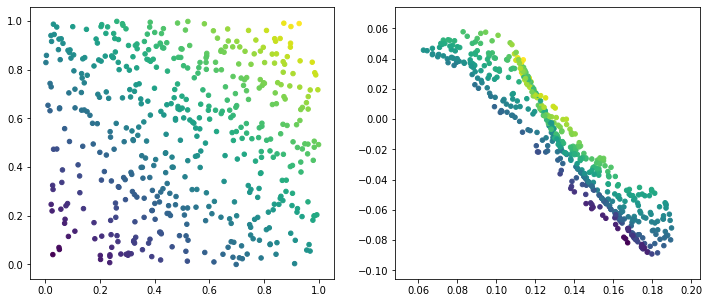

In [111]:
import torch.nn as nn

X = torch.rand(500, 2)
y = X[:, 0] + X[:, 1]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], 20, y)

n_hidden = 10
model = nn.Sequential(nn.Linear(2, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, 2))
# model.to(device)
with torch.no_grad():
    Y = model(X)
plt.subplot(1, 2, 2)
plt.scatter(Y[:,0], Y[:,1], 20, y)

## Пример

In [112]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import random, math
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

# данные
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)

    inner_var = torch.linspace((2 * math.pi / C) * (c), (2 * math.pi / C) * (2 + c), N) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((math.sin(inner_var[index]), math.cos(inner_var[index])))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


In [113]:
from IPython import display
learning_rate = 1e-3
lambda_l2 = 1e-5

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

for t in range(1000):
    
    y_pred = model(X)

    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    
    loss.backward()

    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.161706, [ACCURACY]: 0.954


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


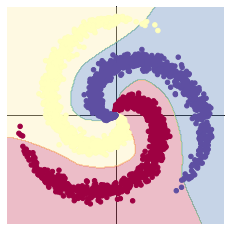

In [114]:
print(model)
plot_model(X, y, model)

### НС на numpy

дальше примеры из https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [115]:
%%time

import numpy as np

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(5000):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    # print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
print(loss)

1.74824768139619e-24
Wall time: 2.55 s


In [116]:
%%time

import torch


dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(5000):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    #if t % 100 == 99:
    #   print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

print(loss)
# CPU 3.05 s
# GPU 6.77 s

2.74573608294304e-07
Wall time: 7.42 s


In [117]:
%%time

import torch

dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(5000):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    #if t % 100 == 99:
    #    print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()
        
print (loss.item())

# CPU 5.7 s
# GPU 8.87 s

3.4651128544282983e-07
Wall time: 7.52 s


# Пример пакета nn

In [118]:
%%time

import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(5000):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    #if t % 100 == 99:
    #    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            
print(loss.item())
# CPU 8.05 s

1.0499554350951179e-11
Wall time: 7.21 s


In [119]:
%%time

import torch

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')


learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(5000):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    # if t % 100 == 99:
    #     print(t, loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    
print(loss.item())

1.0213095993916177e-11
Wall time: 10.3 s


## отдельные Log-регрессии и одна многомерная

* отдельные - очень медленно на 1 GPU

In [120]:
class MyOneModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MyOneModel, self).__init__()
        self.bn1 = nn.BatchNorm1d(in_features)
        self.do1 = nn.Dropout(0.3)
        self.ln1 = nn.Linear(in_features, out_features) # nn.utils.weight_norm(nn.Linear(n1, n2))
        self.ph1 = nn.Sigmoid()
        
    def forward(self, x):
        z = self.ph1(self.ln1(self.do1(self.bn1(x)))) # 
        return z
    
class MyModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MyModel, self).__init__()
        # self.out_features = out_features
        self.mymodules = nn.ModuleList([MyOneModel(in_features, 1) for _ in range(out_features)])
        # self.parameters = nn.ParameterList([f.parameters for f in self.mymodules])
        
    def forward(self, x):
        z = torch.cat([f(x) for f in self.mymodules], axis=1)
        # print(z.size(), self.mymodules[0](x).size())
        return z